# Introduction to Image Processing with Numpy/Scipy

In this tutorial we'll load up and use our first SciPy modules.  SciPy is basically a set of modules built on top of NumPy.  Each SciPy package has some specific area of focus, such as signal analysis, image processing, curve fitting, etc.  

Today we'll be using a few capabilities of the **ndimage** SciPy package.  We'll also use the **misc** package to load and save image files.


## What to turn in:

Submit this Jupyter Notebook with all questions answered & commands executed.  If your images / graphs / graphics pop up in external windows, save those to files and submit those images too.  If they instead are inline in this notebook make sure they are shown.

## Quiz this week

There will be a pre-lab quiz on this material.  We will ask a few simple but pointed questions to see what you understand about this material.

## Step 1.  Normal imports

In the cell below, write your two import statements for Numpy and Matplotlib.

In [1]:
#Put your Numpy and matplotlib imports here.
import numpy as np
import matplotlib.pyplot as plot  #Showing plots/graphics

## Step 2. SciPy image processing packages

Now import the following packages too:

In [2]:
import matplotlib.cm as cm  # Color mappings!! 
from scipy import ndimage as nd   #Doing image manipulation / calculations
import imageio #For reading images

## Discussion:  What is an image?

Before we go on to step 3 (loading up an image) we need to talk about what an image is.

A black and white image is in essence a 2 dimensional array, where each location in the matrix contains **intensity** information ranging from 0 to 255  (the number of values that a single **byte** can represent). 0 represents pure black, and 255 represents pure white.

You're familiar with a 2D array:  it's called a matrix.  NumPy can represent matrices very easily.  The example below creates a small 2D array of values.  Run it now:


In [3]:
my_bw_pic = np.array([ [0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ],
                       [0  ,255,0  ,0  ,0  ,0  ,255,0  ],
                       [200,0  ,200,0  ,0  ,200,0  ,200],
                       [0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ],
                       [0  ,200,0  ,0  ,0  ,0  ,200,0  ],
                       [0  ,0  ,250,250,250,250,0  ,0  ] ])

* Notice that a 2D array---a matrix---is specified in Python / Numpy as an array containing 1D arrays.  Each 1D array is a row in the matrix, and the commas serve to denote the entries in columns.  Each row is put between square brackets as normal, but remember also that each row is separated from each subsequent row by a comma.  The whole thing has square brackets around it.

* We can actually **display this matrix as a graphic** using the **imshow()** function.  This is basically what a black and white digital photo is!

* The command below contains a few special parameters.  The <code>interpolation</code> command ensures that the image is shown as-is without any smoothing (necessary for tiny images).  The <code>cmap</code> applies the correct colors.  We'll talk more about this in a bit.

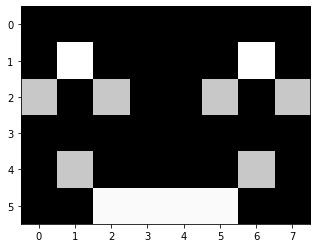

In [4]:
plot.imshow(my_bw_pic, interpolation='nearest', cmap=cm.gray)
plot.show()

* **Question 0**.  What did this show? 

This showed a smiling face.

## Step 3.  Load up our image

We have included an example image for you to process, "<code>galaxypic1.jpg</code>".  Make sure that file is in the **same folder** as this tutorial.  (It should be, because this came as a .zip archive and both files should have been unzipped into the same place.)

The first thing we have to do is **load the file**.  The <code>misc.imread()</code> function will *load the file directly into a multi-dimensional NumPy array!*

In [5]:
#Load up the file.
galaxy = imageio.imread('galaxypic1.jpg')

In [6]:
galaxy.shape

### NOTE WELL:
#
#  In terms of array indices,  the format is  galaxy[ y , x , color_channel]
#  !!!!!
#

(1280, 1280, 3)

## What does this mean?

galaxy.shape  is a tuple (not a function) which tells us the dimensions of the NumPy array.   As you can see it is a two dimensional array (1280 x 1280 pixels) where each (y,x) pixel location has **three** values associated with it -- a value for **red**, **green**, and **blue** which varies between 0 and 255. The fact that each pixel has red, green and blue color information is what allows your computer to display the image in color!  

You can thus think about a color image in 2 equivalent ways:  As a 2D matrix where each location contains a triple (red, green, blue), *OR* as a stack of three matrices, one containing red color intensity; one containing green color intensity; and one containing blue color intensity.  

**Notice that pixel positions are reversed from what you'd expect -- <code>galaxy[y, x]</code> gives you the pixel at vertical position y and horizontal position x within the image.  We will refer to its location as (y,x) in this tutorial when necessary!**

So for example, type in and execute the following command in the cell below:

<code>galaxy[400,500]</code>

In [7]:
galaxy[400,500]

Array([32, 42, 51], dtype=uint8)

* **Question 1.**  What intensity of red, green, and blue does the pixel at (y, x) position (400,500) contain?  Write your answer below.

### Answer to question 1:

The pixel at (y, x) position (400, 500) has a red intensity of 32, a green intensity of 42, and a blue intensity of 51.

## Step 4.  Displaying the full color image

We will use the <code>matplotlib.pyplot</code> command "<code>imshow()</code>" to display the image.

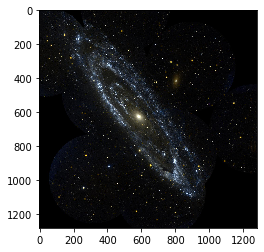

In [8]:
#Show the full color image
plot.imshow(galaxy)
plot.show()  # ALWAYS MUST SHOW IT!

* **Question 2.** What is the approximate (y,x) location of the center of the galaxy?  Write your answer below.

### Answer to question 2:

The approximate (y, x) location of the center of the galaxy is (620, 580).

## What about each color channel separately?

Your computer can display an image in color because each pixel location contains red, green, and blue color intensity information. Your computer inteprets this information by lighting groups of microscopic red, green, and blue pixels on your screen; the red,green, and blue light blends together to form a colored pixel.

If you take (for example) the red color information separately, it is simply a 2D matrix of values from 0 to 255.  This, taken alone, will show up as a grayscale image -- one that happens to show the intensities in the red color channel, but it will be displayed in a grayscale.  

You can certaintly do this -- show each color channel separately (red values only, blue values only, or green values only).   This is done by *slicing* the color image array, which needs 3 indices:  y, x, and color.  For instance,  galaxy[:, :, 0]  will show all of the x and y pixels in the red color channel (the third index goes from 0 to 2, with red = 0, green = 1, etc.)

*Because matplotlib will not have information for red, green and blue anymore, it must use a "**color map**" to display the image in a user-specified system for coloring the intensity information it contains.  The most straightforward thing to do when displaying only one color channel is to **graymap** it, meaning that more intense values are lighter shades of gray and less intense values are darker, on a scale from black to white*.  

The statement below shows only the **red** color channel:

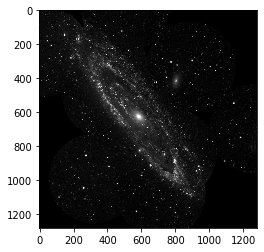

In [16]:
plot.imshow(galaxy[:,:,0], cmap=cm.gray)   
plot.show()

* **Question 3.** In the cell below, show only the **blue** color channel.

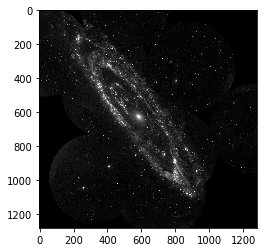

In [15]:
plot.imshow(galaxy[:,:,2], cmap=cm.gray)   
plot.show()

## False color


You can apply a **false color** color map to show pixel intensities.  This is often what **heat vision** cameras do, assigning *blues* to lower temperatures and *reds* and *oranges* to higher temperatures.  There is no actual color information in a thermal vision image; each pixel contains only a single value that can range from 0 to 255, which corresponds to temperature detected.  This value is **mapped** onto a color range by your computer's display system.  You can do the same with a color channel from your galaxy:



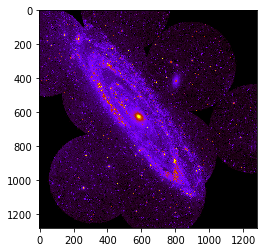

In [17]:
plot.imshow(galaxy[:,:,1], cmap=cm.gnuplot)  ## show the GREENS in your galaxy with a false color 
 #  We use a nice looking colormap known as the "gnuplot" color map.
plot.show()

## A fancier example

The example below creates sub plots which show the red, green, and blue color channels separately for the galaxy.

The "<code>subplot()</code>" function creates subplots on the main plot. Here is how it works:  If "<code>x</code>" is an integer from 1 to 3, then --

<code>subplot(13x)</code> refers to a set of 3 plots horizontally in a line from each other (1 horizontal row of 3 columns, subplots,  with x selecting the x-th plot in that row).

<code>subplot(31x)</code> refers to a set of 3 plots placed in a vertical column above each other (3 rows, 1 column, with x selecting the x-th plot in that column).

In the example below we do the following:

1. Create three different arrays containing red, green, and blue color information separately.

2. Display each array in its own sub plot with a false color map onto the same color as it actually represents!


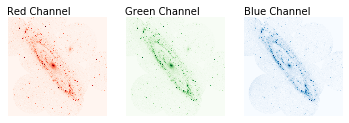

In [18]:
#Show red, green and blue separately.
# We use a color mapping that looks like a photographic negative, in this case.

redchannel = galaxy[:,:,0]
greenchannel = galaxy[:,:,1]
bluechannel = galaxy[:,:,2]

ax = plot.subplot(131)
plot.axis('off')
plot.imshow(redchannel,cmap=cm.Reds)  #Can also use  cmap=cm.gray
ax.text(-10,-40,'Red Channel')

bx = plot.subplot(132)
plot.axis('off')
plot.imshow(greenchannel,cmap=cm.Greens)  #Can also use cmap=cm.gray
bx.text(-10,-40, 'Green Channel')

cx = plot.subplot(133)
plot.axis('off')
plot.imshow(bluechannel,cmap=cm.Blues)   #Can also use cmap=cm.gray
cx.text(-10,-40,'Blue Channel')

plot.show()

* **Question 4**. Based on the examples so far and what you know about array slicing, figure out how to display only part of the galaxy image, the rectangle from (y,x) = (50,50) to (y,x) = (600, 700).  Display the galaxy in full color; do not separate color channels.

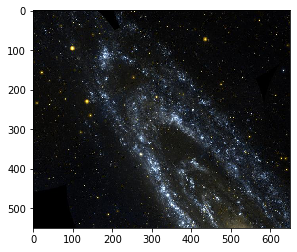

In [19]:
plot.imshow(galaxy[50:600,50:700,:])
plot.show()

* **Question 5**. Use color mapping and subplots to display the red, green and blue color channels separately **in grayscale** in a **vertical column of subplots** (placed vertically one above the other) rather than in a horizontal row as in the 'fancy example' above.

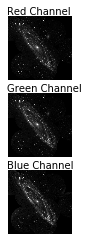

In [20]:
redchannel = galaxy[:,:,0]
greenchannel = galaxy[:,:,1]
bluechannel = galaxy[:,:,2]

ax = plot.subplot(311)
plot.axis('off')
plot.imshow(redchannel,cmap=cm.gray)
ax.text(-10,-40,'Red Channel')

bx = plot.subplot(312)
plot.axis('off')
plot.imshow(greenchannel,cmap=cm.gray)
bx.text(-10,-40, 'Green Channel')

cx = plot.subplot(313)
plot.axis('off')
plot.imshow(bluechannel,cmap=cm.gray)
cx.text(-10,-40,'Blue Channel')

plot.show()

## Step 5.  Getting more information about the image

Since the galaxy is a NumPy array you can use all of the expected NumPy commands on it, including <code>mean()</code>, <code>min()</code>, <code>max()</code>, etc.  

In [21]:
#For the red channel
redavg = galaxy[:,:,0].mean()
redmin = galaxy[:,:,0].min()
redmax = galaxy[:,:,0].max()

print("Red channel mean: "+str(redavg))
print("Red channel min: "+str(redmin))
print("Red channel max: "+str(redmax))

Red channel mean: 13.215082397460938
Red channel min: 0
Red channel max: 255


## Creating a total intensity map

Another way to examine the image, instead of using separate color channels, is to **average** the color channels together.  This will turn the image essentially into a black and white image of mean intensity for each pixel:

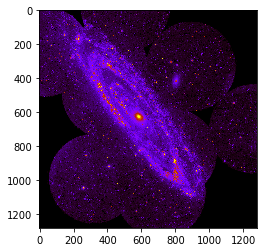

In [22]:
#Average the color channels together
galaxy_mean = 0.333333*galaxy[:,:,0]+0.333333*galaxy[:,:,1]+0.333333*galaxy[:,:,2]

#The above process gives very different (better) results than summing and then dividing by 3!!! 
#It's because galaxy is stored as a type 8 bit integer (0 to 255), and summing them produces
# an 8 bit integer that has gone out of range (you can't fit 255 times 3  into a data type
# that only goes up to 255!   )
#
# So instead you multiply each separately by 0.33333 which converts the result into a float
# which has a far bigger maximum value it can store and more resolution obviously.  

#SHOW A FALSE COLOR INTENSITY IMAGE OF THE GALAXY
plot.imshow(galaxy_mean, cmap = cm.gnuplot)
plot.show()

## Blurring the image

The following commands activate a simple **Gaussian filter** which smooths the image by giving each pixel the value of a weighted mean of the pixels around it!

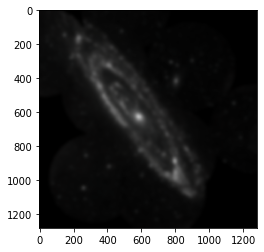

In [26]:
#Blur the image

very_blurred = nd.gaussian_filter(galaxy, sigma=10)
plot.imshow(very_blurred,cmap=cm.gray)
plot.show()

* **Question 6**.  The *sigma* parameter determines how much blurring is applied.  Display an image below with half as much blurring as our example.

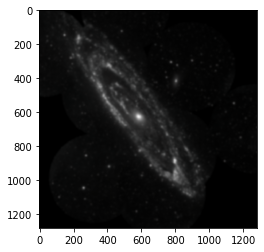

In [28]:
very_blurred = nd.gaussian_filter(galaxy, sigma=5)
plot.imshow(very_blurred,cmap=cm.gray)
plot.show()

## Calculating the centroid of a pixel intensity cluster

The part of the image in the rectangle between <code>y = 350 to 480</code>  and <code>x = 750 to 865</code> shows a small neighboring galaxy.  We would very much like to calculate its center.  

We can do this, as a first pass, very much as we calculate the center of mass of a system of point masses!  The mean intensity at a given position can be likened to mass, and the location of each pixel is known because they're all arranged in a rectangular array:

$$ (Y, X)_{\text{cm}} = \frac{1}{\text{total summed intensity of all pixels}} \sum_{pixels} (\text{pixel intensity})\cdot(y,x)$$

What this means is that we can **use a for loop** to loop through each pixel in our chosen rectangle:


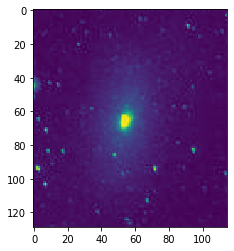

In [29]:
#First let's show the rectangle in question that we're examining!
my_rectangle = galaxy_mean[350:479,750:865]


plot.imshow(my_rectangle)
plot.show()

### Now execute the code below, which performs the calculation:

In [30]:
#First use a dirty trick to convert all values into floating point
floatingpoint_version = my_rectangle[:,:]/1.0

#Now we can sum up the intensities and have enough numerical resolution to do this.
summed_intensity = floatingpoint_version[:,:].sum()

R = np.array([0,0])

#Now that we've got that calculated, loop through each pixel:
for j in range(0,my_rectangle.shape[0]):  #LOOP THROUGH Y PIXEL POSITIONS
    for i in range(0,my_rectangle.shape[1]):  #LOOP THROUGH X PIXEL POSITIONS
        R = R + np.array([j,i])*my_rectangle[j,i]  #MULTIPLY EACH POSITION BY INTENSITY IT CONTAINS

#Now finally get the mean by dividing by total summed intensity of ALL pixels in the rectangle:
R = R/summed_intensity

print(R)  #(Y, X) position of the centroid
    

[64.78957335 53.90197325]


## Now in theory we've approximately found the center of this small galaxy

* **Final example**. Let's draw a *white crosshair* on the position we've calculated.  You can do this using the basic plot() command you're familiar with! You would first *show the image*, next plot a plot with a single data point with a "point marker" designated as a + sign, and finally *show()* the image.

Notice the x and y coordinates are reversed in the plot command -- the format is (x,y), and the position we have calculated has the form (y,x), so you will have to swap those coordinates!

**Execute the code below**

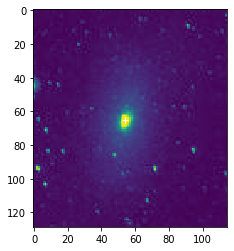

In [31]:
plot.imshow(my_rectangle)
plot.plot([54], [65],'w+')
plot.show()

**Question 7**.  What did this show?  Did the calculation find the exact center of the small galaxy?  If it wasn't exactly on the mark, think about why that might be?  How could you make the calculation more accurate?

### Markdown cell.  Type your answer here.

The calculation did not find the exact center of the small galaxy. This can be due to the noise of the stars around it. We can make the calculation more accurate by dimming the edges so those stars have less of an effect or zooming in further on the galaxy.

**Question 8**.  In the centroid calculation cell above, what is <code>my_rectangle</code> and what information does it contain?  In the centroid calculation, explain in your own words, line-by-line, what is going on beginning with the line "<code>for j in range...</code>"

### Markdown cell.  Type your answer here.

my_rectangle is a 2D array holding the brightness value (average of red, green, and blue) from 350 to 479 in y and from 750 to 865 in x. 

First looping through all the y values, then looping through all the x values (thus looping through every pixel), multiply the brightness value by that pixel's position. Sum together all of those products and then divide the sum by the total brightness of the whole image. This gives the y and x coordinates of the center of brightness.